# **Project-5**

### Import necessary library




In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import  classification_report ,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.datasets import mnist
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from keras.callbacks import EarlyStopping, ModelCheckpoint
import keras
import keras_tuner


## Data Loading and Preprocessing

In [ ]:
# Download the MNIST dataset
mnist = tf.keras.datasets.mnist

In [ ]:
#Spliting the dataset into train and test
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()
# Preprocess the data
X_train_full, X_test = X_train_full / 255.0, X_test / 255.0

In [ ]:
np.unique(y_train_full)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [ ]:
X_test.shape

(10000, 28, 28)

In [ ]:
#Spliting the training into train and validation
X_valid, X_train = X_train_full[:4000], X_train_full[4000:]
y_valid, y_train = y_train_full[:4000], y_train_full[4000:]

In [ ]:
print('Shape X_valid:' , X_valid.shape)
print('Shape y_valid:' , y_valid.shape)
print('Shape X_train:' , X_train.shape)
print('Shape y_train:' , y_train.shape)

Shape X_valid: (4000, 28, 28)
Shape y_valid: (4000,)
Shape X_train: (56000, 28, 28)
Shape y_train: (56000,)


In [ ]:
X_train_flat = X_train.reshape(56000,784)
X_test_flat = X_test.reshape(10000,784)
X_valid_flat = X_valid.reshape(4000,784)

## Baseline Model with Traditional Machine Learning Algorithms

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [ ]:
log_reg = LogisticRegression(
    solver= 'newton-cg',
    n_jobs = -1,
    max_iter=500,
    random_state=42,
    verbose=1
                            )

In [ ]:
log_reg.fit(X_train_flat, y_train)

# save
with open('log_reg_intial.pkl','wb') as f:
    pickle.dump(log_reg,f)



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


In [ ]:
# # load
# with open('model.pkl', 'rb') as f:
#     clf2 = pickle.load(f)

In [ ]:
log_score = log_reg.score(X_test_flat , y_test)
log_score

0.9268

In [ ]:
y_pred = log_reg.predict(X_test_flat)
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97       980
           1       0.96      0.98      0.97      1135
           2       0.94      0.90      0.92      1032
           3       0.90      0.91      0.91      1010
           4       0.94      0.94      0.94       982
           5       0.90      0.87      0.88       892
           6       0.94      0.96      0.95       958
           7       0.93      0.93      0.93      1028
           8       0.88      0.89      0.88       974
           9       0.92      0.92      0.92      1009

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000



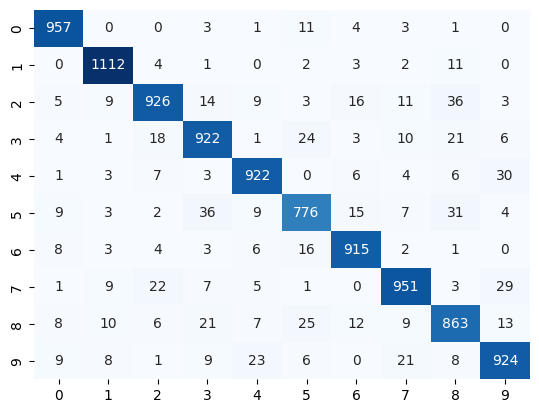

In [ ]:
import seaborn as sns
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False);

## Ensemble of Machine Learning Algorithms

In [ ]:
random_forest = RandomForestClassifier(n_estimators=100 , max_depth = 21 , random_state=42, verbose=1)
svm = SVC(kernel='rbf', probability=True , random_state = 42, max_iter = 5 , verbose=True)

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

In [ ]:
ensemble = VotingClassifier(estimators=[
    ('llg', log_reg),
    ('random_forest', random_forest),
    ('svm', svm)
], voting='soft')

In [ ]:
ensemble.fit(X_train_flat, y_train)

with open('ensemble.pkl','wb') as f:
    pickle.dump(ensemble,f)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:   16.0s


[LibSVM]

C:\Users\manas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=5).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


In [ ]:
ensemble_score = ensemble.score(X_test_flat , y_test)
ensemble_score

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.1s


0.9449

In [ ]:
y_pred_vot= ensemble.predict(X_test_flat)
report_vot = classification_report(y_test, y_pred_vot)
print("Classification Report:\n", report)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.1s


Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97       980
           1       0.96      0.98      0.97      1135
           2       0.94      0.90      0.92      1032
           3       0.90      0.91      0.91      1010
           4       0.94      0.94      0.94       982
           5       0.90      0.87      0.88       892
           6       0.94      0.96      0.95       958
           7       0.93      0.93      0.93      1028
           8       0.88      0.89      0.88       974
           9       0.92      0.92      0.92      1009

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000



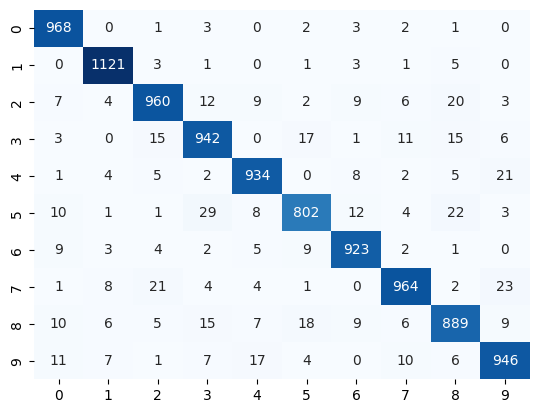

In [ ]:
conf_matrix_vot = confusion_matrix(y_test, y_pred_vot)
sns.heatmap(conf_matrix_vot, annot=True, fmt="d", cmap="Blues", cbar=False);

## Neural Network Model Design

In [ ]:
y_train_enc = to_categorical(y_train)
y_test_enc = to_categorical(y_test)
y_valid_enc = to_categorical(y_valid)

In [ ]:
#Define Multiple Network Architectures CNN
def create_model(num_layers, neurons, activation, use_dropout=False):
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation=activation, input_shape=(28, 28, 1)))
    model.add(layers.MaxPooling2D((2, 2)))

    for _ in range(num_layers - 1):
        model.add(layers.Conv2D(neurons, (3, 3), activation=activation))
        if use_dropout:
            model.add(layers.Dropout(0.3))
        model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Flatten())
    model.add(layers.Dense(10, activation='softmax'))

    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model

In [ ]:
# Experiment with Different Configurations
models_to_train = [
    create_model(2, 64, 'relu'),
    create_model(3, 64, 'relu', use_dropout=True),
    create_model(2, 64, 'tanh'),
    create_model(3, 64, 'tanh', use_dropout=True)
]

C:\Users\manas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [ ]:
# Compile, Train and eavaluate the Models
history_dict = {}

for i, model in enumerate(models_to_train):
    print(f"Training model {i+1}/{len(models_to_train)}...")
    history = model.fit(
        X_train, y_train_enc,
        epochs=10,
        batch_size=64,
        validation_data=(X_valid, y_valid_enc)
    )
    history_dict[i] = history.history

Training model 1/4...
Epoch 1/10
875/875 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.8632 - loss: 0.4785 - val_accuracy: 0.9790 - val_loss: 0.0744
Epoch 2/10
875/875 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9790 - loss: 0.0679 - val_accuracy: 0.9830 - val_loss: 0.0580
Epoch 3/10
875/875 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9853 - loss: 0.0476 - val_accuracy: 0.9877 - val_loss: 0.0480
Epoch 4/10
875/875 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9886 - loss: 0.0371 - val_accuracy: 0.9902 - val_loss: 0.0392
Epoch 5/10
875/875 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9908 - loss: 0.0300 - val_accuracy: 0.9862 - val_loss: 0.0435
Epoch 6/10
875/875 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9922 - loss: 0.0249 - val_accuracy: 0.9883 - val_loss: 0.0386
Epoch 7/10
875/875 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9940 - loss: 0.0194 - val_accuracy: 0.9902 - val_loss: 0.0355
Epoch 8/10
875/875 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9951 - loss: 0.0

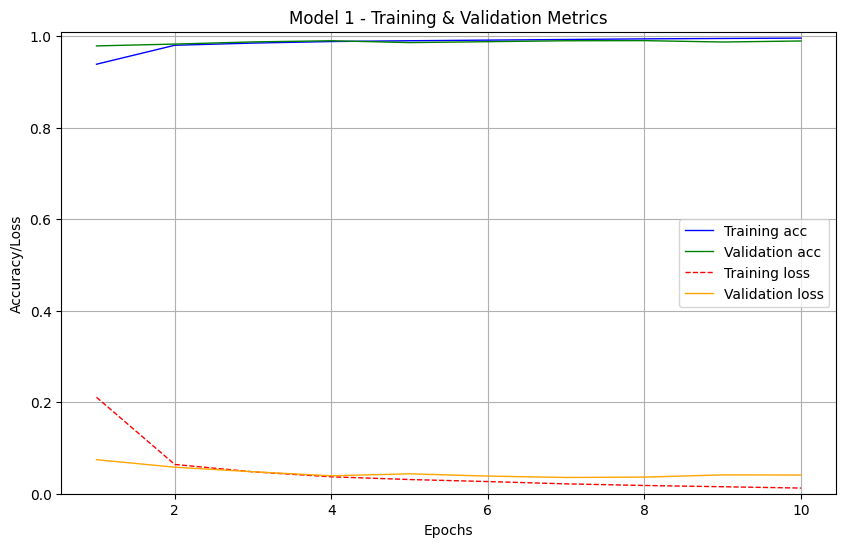

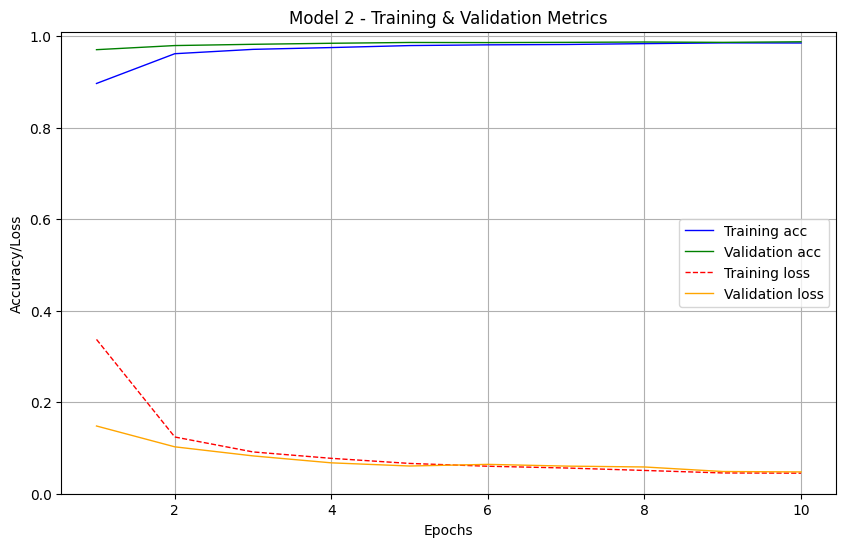

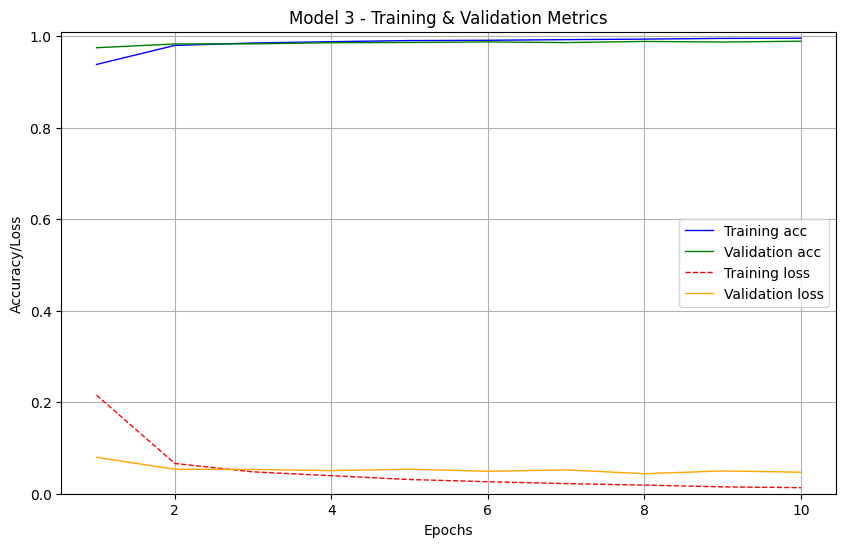

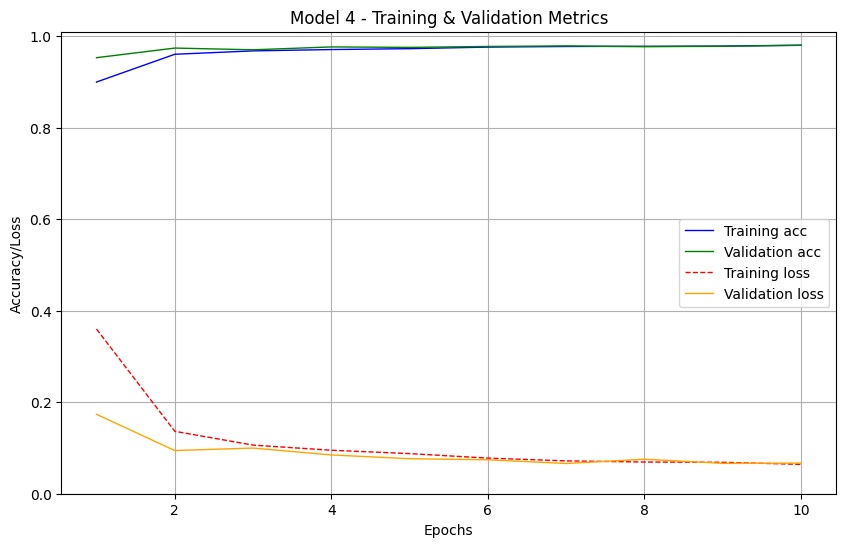

In [ ]:
import matplotlib.pyplot as plt

def plot_history(histories):
    for i, history in histories.items():
        epochs = range(1, len(history['accuracy']) + 1)
        plt.figure(figsize=(10, 6))
        plt.plot(epochs, history['accuracy'], 'b', label='Training acc', linewidth=1)
        plt.plot(epochs, history['val_accuracy'], 'g', label='Validation acc', linewidth=1)
        plt.plot(epochs, history['loss'], 'r--', label='Training loss', linewidth=1)
        plt.plot(epochs, history['val_loss'], 'orange', label='Validation loss', linewidth=1)
        plt.title(f'Model {i+1} - Training & Validation Metrics')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy/Loss')
        plt.legend()
        plt.ylim(0, 1.01)
        plt.grid(True)
        plt.show()

plot_history(history_dict)

In [ ]:
for i, model in enumerate(models_to_train):
    test_loss, test_acc = model.evaluate(X_test, y_test_enc)
    print(f"Model {i+1}: Test Accuracy = {test_acc}, Test Loss = {test_loss}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9884 - loss: 0.0415
Model 1: Test Accuracy = 0.9901999831199646, Test Loss = 0.03347259387373924
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9863 - loss: 0.0518
Model 2: Test Accuracy = 0.989300012588501, Test Loss = 0.04264901205897331
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9843 - loss: 0.0543
Model 3: Test Accuracy = 0.987500011920929, Test Loss = 0.04267458990216255
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9764 - loss: 0.0728
Model 4: Test Accuracy = 0.980400025844574, Test Loss = 0.0633683130145073


In [ ]:
models_to_train[0].save('keras_intial.keras')

best_ini_model = models_to_train[0]

In [ ]:
score_list = best_ini_model.evaluate(X_test, y_test_enc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9884 - loss: 0.0415


In [ ]:
best_ini_score = score_list[1]

In [ ]:
y_pred_keras_ini = best_ini_model.predict(X_test)
classes_x=np.argmax(y_pred_keras_ini,axis=1)

# report_ker_ini = classification_report(y_test_enc, y_pred_keras_ini)
# print("Classification Report:\n", report_ker_ini)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [ ]:
report_keras_ini = classification_report(y_test, classes_x)
print("Classification Report:\n", report_keras_ini)

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      1.00      1135
           2       0.98      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.98      0.99       892
           6       1.00      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.98      0.99       974
           9       0.98      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



Confusion Matrix:


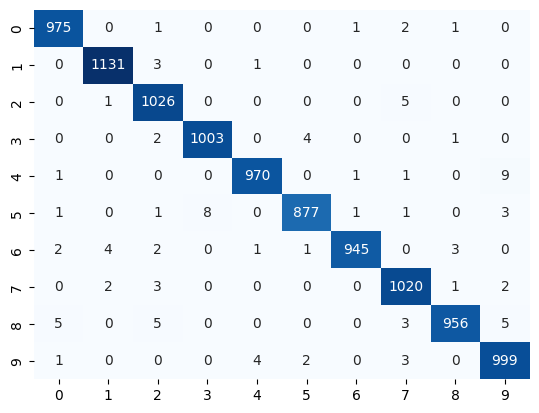

In [ ]:
print("Confusion Matrix:")
conf_matrix_ini = confusion_matrix(y_test, classes_x)
sns.heatmap(conf_matrix_ini, annot=True, fmt="d", cmap="Blues", cbar=False);


### Keras Tuner

In [ ]:
def call_existing_code(units, activation, dropout, lr, num_layers):
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation=activation, input_shape=(28, 28, 1)))
    model.add(layers.MaxPooling2D((2, 2)))

    for _ in range(num_layers - 1):
        model.add(layers.Conv2D(units, (3, 3), activation=activation))
        if dropout:
            model.add(layers.Dropout(0.3))
        model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Flatten())
    model.add(layers.Dense(10, activation='softmax'))

    model.compile(optimizer=keras.optimizers.Adam(learning_rate=lr),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model


def build_model(hp):
    num_layers = hp.Int('num_layers', 2, 5)
    units = hp.Int("units", min_value=100, max_value=500, step=50)
    activation = hp.Choice("activation", ["relu"])
    dropout = hp.Boolean("dropout")
    lr = hp.Float("lr", min_value=1e-4, max_value=1e-2, sampling="log")
    # call existing model-building code with the hyperparameter values.
    model = call_existing_code(
        units=units, activation=activation, dropout=dropout, lr=lr, num_layers=num_layers
    )
    return model



In [ ]:
tuner = keras_tuner.RandomSearch(
    hypermodel=build_model,
    objective="val_accuracy",
    max_trials=5,
    executions_per_trial=1,
    overwrite=True,
    directory="Models",
    project_name="project_6",
)

C:\Users\manas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [ ]:
tuner.search_space_summary()

Search space summary
Default search space size: 5
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 5, 'step': 1, 'sampling': 'linear'}
units (Int)
{'default': None, 'conditions': [], 'min_value': 100, 'max_value': 500, 'step': 50, 'sampling': 'linear'}
activation (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu'], 'ordered': False}
dropout (Boolean)
{'default': False, 'conditions': []}
lr (Float)
{'default': 0.0001, 'conditions': [], 'min_value': 0.0001, 'max_value': 0.01, 'step': None, 'sampling': 'log'}


In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True)
tuner.search(X_train, y_train_enc, epochs=50, validation_data=(X_valid, y_valid_enc), callbacks=[early_stopping])

Trial 5 Complete [00h 00m 00s]

Best val_accuracy So Far: 0.9919999837875366
Total elapsed time: 00h 23m 20s


In [ ]:
models = tuner.get_best_models(num_models=2)
best_model = models[0]

C:\Users\manas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\saving\saving_lib.py:396: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 14 variables. 
  trackable.load_own_variables(weights_store.get(inner_path))


In [ ]:
best_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 450)    │       130,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 450)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 11250)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │       112,510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 242,880 (948.75 KB)

 Trainable params: 242,880 (948.75 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from sklearn.metrics import classification_report , confusion_matrix
import time
import numpy as np
start_time = time.time()
test_predictions = np.argmax(best_model.predict(X_test), axis=-1)

print(classification_report(y_test,test_predictions))
print("Time taken to predict the model " + str(time.time() - start_time))

conf_matrix = confusion_matrix(y_test, test_predictions)



313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      1.00      1.00      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       1.00      0.98      0.99       958
           7       0.99      1.00      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

Time taken to predict the model 1.4527721405029297


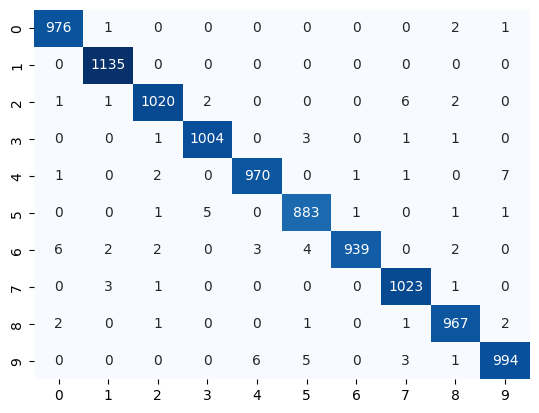

In [ ]:
conf_matrix_tuner = confusion_matrix(y_test, test_predictions)
sns.heatmap(conf_matrix_tuner, annot=True, fmt="d", cmap="Blues", cbar=False);
score_list_tuned = best_model.evaluate(X_test, y_test_enc)
best_tuned_score = score_list_tuned[1]


### PCA

In [ ]:
pca = PCA(n_components=0.95)
pca.fit(X_train_flat)
X_train_pca = pca.transform(X_train_flat)
X_test_pca = pca.transform(X_test_flat)

def create_pca_model(input_shape):
    model = models.Sequential()
    model.add(layers.Dense(512, activation='relu', input_shape=(input_shape,)))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(10, activation='softmax'))
    return model

pca_input_shape = X_train_pca.shape[1]
pca_model = create_pca_model(pca_input_shape)

pca_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    verbose=1,
    restore_best_weights=True
)

history_pca = pca_model.fit(
    X_train_pca, y_train_enc,
    epochs=50,
    batch_size=64,
    validation_split=0.1,
    callbacks=[early_stopping]
)

test_loss_pca, test_acc_pca = pca_model.evaluate(X_test_pca, y_test_enc)
print(f"Test accuracy with PCA: {test_acc_pca}")

Epoch 1/50


C:\Users\manas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


788/788 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8095 - loss: 0.6730 - val_accuracy: 0.9652 - val_loss: 0.1345
Epoch 2/50
788/788 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9459 - loss: 0.1843 - val_accuracy: 0.9757 - val_loss: 0.0943
Epoch 3/50
788/788 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9623 - loss: 0.1250 - val_accuracy: 0.9786 - val_loss: 0.0798
Epoch 4/50
788/788 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9712 - loss: 0.0948 - val_accuracy: 0.9804 - val_loss: 0.0729
Epoch 5/50
788/788 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9749 - loss: 0.0825 - val_accuracy: 0.9839 - val_loss: 0.0630
Epoch 6/50
788/788 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9787 - loss: 0.0700 - val_accuracy: 0.9834 - val_loss: 0.0629
Epoch 7/50
788/788 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9820 - loss: 0.0590 - val_accuracy: 0.9861 - val_loss: 0.0631
Epoch 8/50
788/788 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9839 - loss: 0.0527 - val_accuracy: 0.9854 - val_

In [ ]:
PCA_list = pca_model.evaluate(X_test_pca, y_test_enc)
PCA_score = PCA_list[1]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 643us/step - accuracy: 0.9789 - loss: 0.0735


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 56000 samples in 0.010s...
[t-SNE] Computed neighbors for 56000 samples in 3.368s...
[t-SNE] Computed conditional probabilities for sample 1000 / 56000
[t-SNE] Computed conditional probabilities for sample 2000 / 56000
[t-SNE] Computed conditional probabilities for sample 3000 / 56000
[t-SNE] Computed conditional probabilities for sample 4000 / 56000
[t-SNE] Computed conditional probabilities for sample 5000 / 56000
[t-SNE] Computed conditional probabilities for sample 6000 / 56000
[t-SNE] Computed conditional probabilities for sample 7000 / 56000
[t-SNE] Computed conditional probabilities for sample 8000 / 56000
[t-SNE] Computed conditional probabilities for sample 9000 / 56000
[t-SNE] Computed conditional probabilities for sample 10000 / 56000
[t-SNE] Computed conditional probabilities for sample 11000 / 56000
[t-SNE] Computed conditional probabilities for sample 12000 / 56000
[t-SNE] Computed conditional probabilities for sam

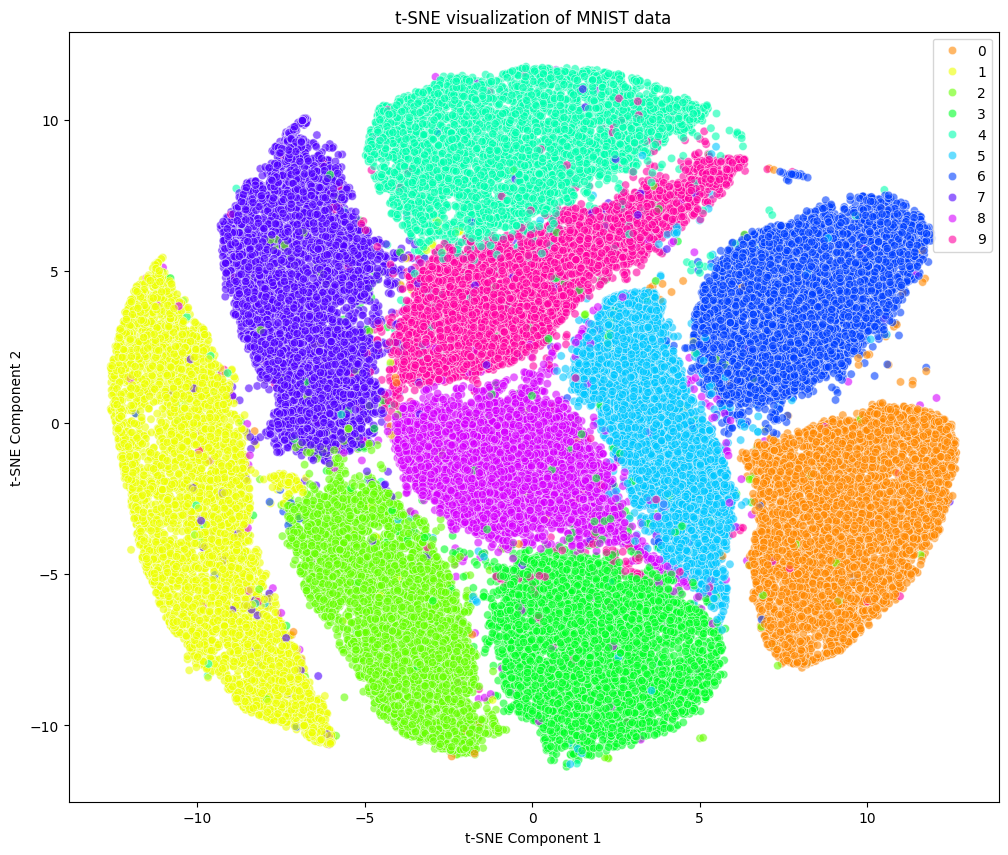

In [ ]:
# Reduce dimensionality before t-SNE with PCA to 50 dimensions
pca_tsne = PCA(n_components=50)
X_train_pca_tsne = pca_tsne.fit_transform(X_train_flat)

# Apply t-SNE to visualize the data
tsne = TSNE(n_components=2, verbose=1, perplexity=30, n_iter=300)
X_train_tsne = tsne.fit_transform(X_train_pca_tsne)

# Plot t-SNE results
plt.figure(figsize=(12, 10))
sns.scatterplot(x=X_train_tsne[:, 0], y=X_train_tsne[:, 1], hue=np.argmax(y_train_enc, axis=1),
                palette=sns.color_palette("hsv", 10), legend='full', alpha=0.6)
plt.title('t-SNE visualization of MNIST data')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

### Evaluate models

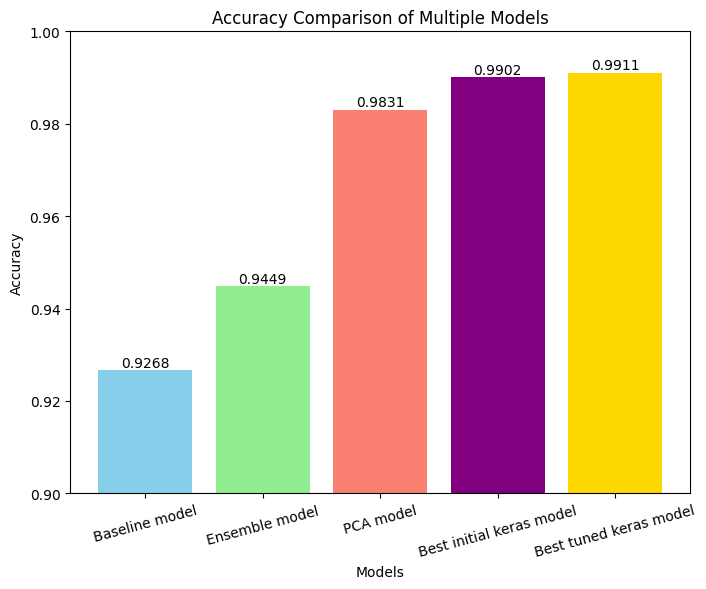

In [ ]:
# List of model names
model_names = ['Baseline model', 'Ensemble model', 'PCA model' , 'Best initial keras model' , 'Best tuned keras model']

# List of accuracy scores for each model
accuracy_scores = [log_score, ensemble_score, PCA_score , best_ini_score, best_tuned_score]

colors = ['skyblue', 'lightgreen', 'salmon', 'purple', 'gold']

# Plotting the accuracies
plt.figure(figsize=(8, 6))
bars = plt.bar(model_names, accuracy_scores, color=colors)
plt.title('Accuracy Comparison of Multiple Models')
plt.xlabel('Models')
plt.xticks(rotation=15)
plt.ylabel('Accuracy')
plt.ylim([0.9, 1])  # Set the y-axis limits
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, "{:.4f}".format(yval), ha='center', va='bottom')
plt.show()